<a href="https://colab.research.google.com/github/jiin-son/credit_card_fraud_detection/blob/main/Explanatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explanatory Data Analysis**

### 1. Load Package, Definition, and Data
#### 1.1. Load Package

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import seaborn as sns

#### 1.2. Load Data

In [2]:
# Choose the file from directory
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2. EDA Analysis
#### 2.1. Descriptive Statistics

In [10]:
# Understanding the target variable (Class)
df['Class'].value_counts()
# imbalance data

0    284315
1       492
Name: Class, dtype: int64

#### 2.2. Pearson Correlation

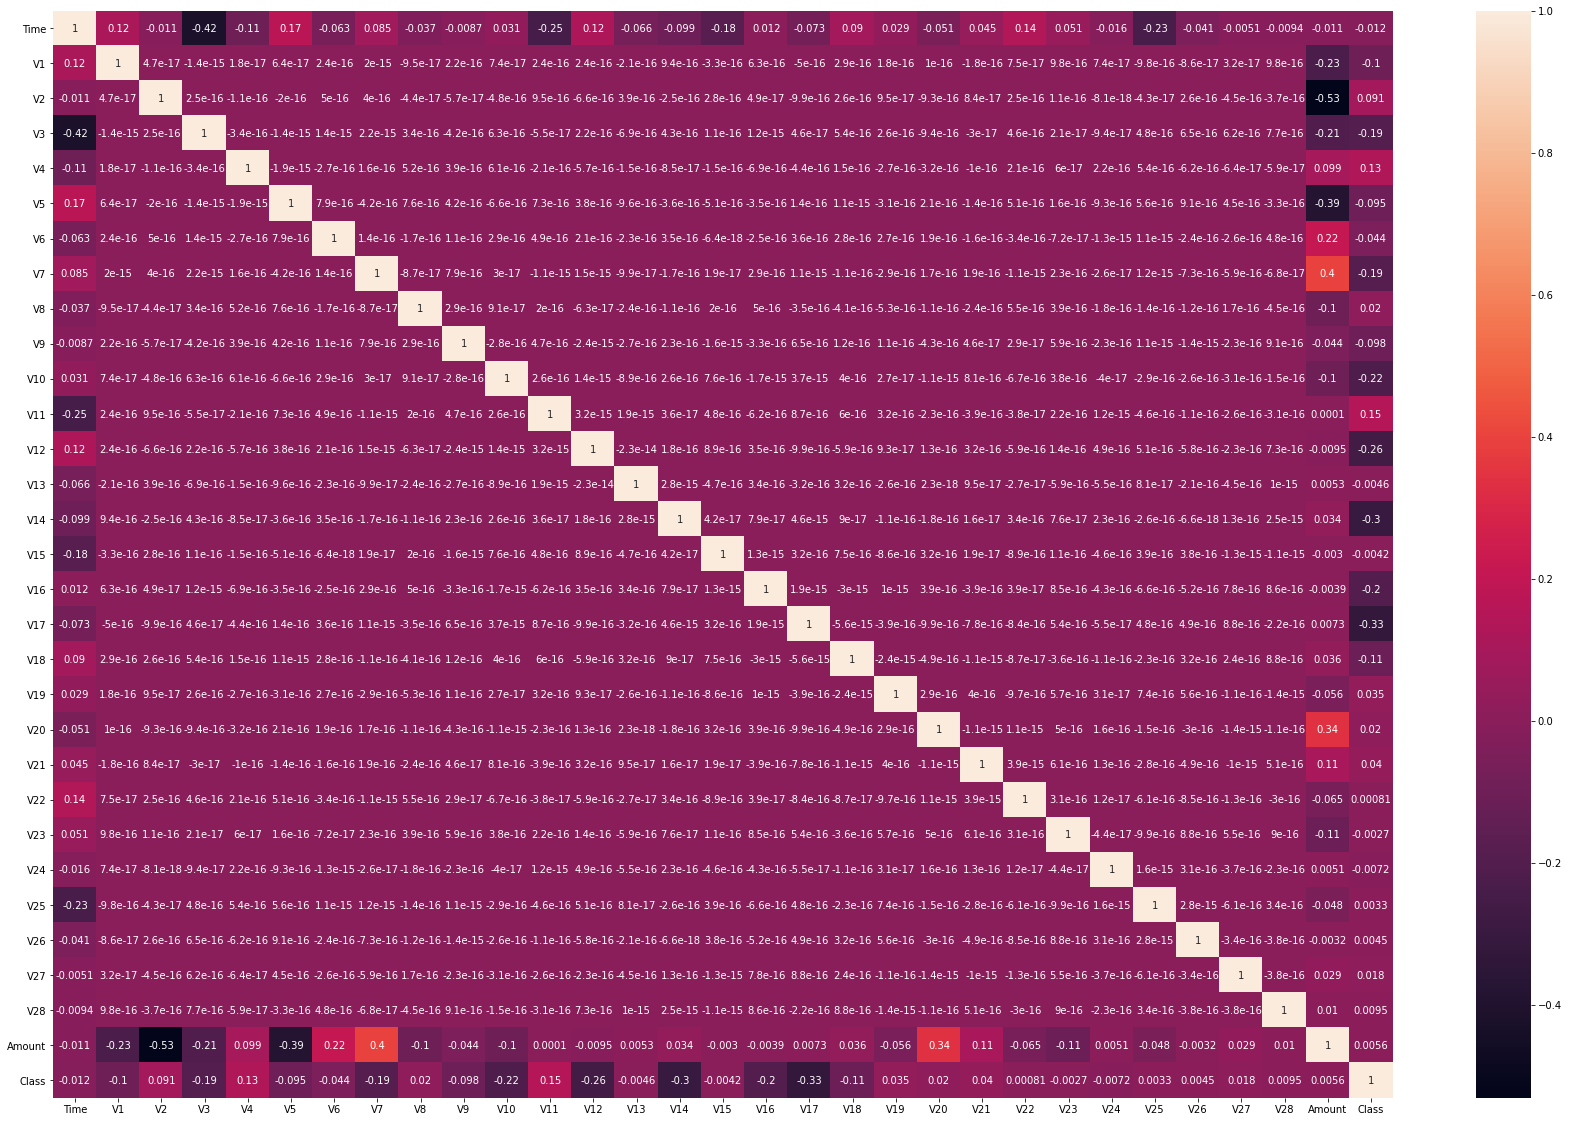

In [13]:
#Display Pearson correlation HeatMap for all variables
plt.figure(figsize=(30,20))
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [27]:
# Take absolute correlation between 'Class' and other variables and sort them in descending order
abs(correlation_mat['Class']).sort_values(ascending = False)

# Take only top 5
top5 = abs(correlation_mat['Class']).sort_values(ascending = False)[1:6]
print(top5)

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
Name: Class, dtype: float64


Highly correlated variables are V17, V14, V12, V10, V16.
Although these variables do not include 'Amount', but I'm planning to include them just to see the prevented loss and incurred loss in dollar amount later. 

#### 2.3. Kernel Density Estimation (KDE) plots

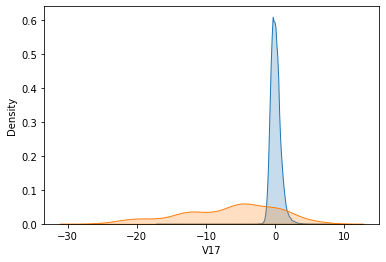

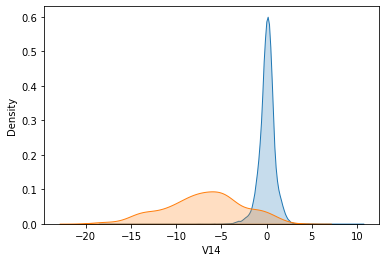

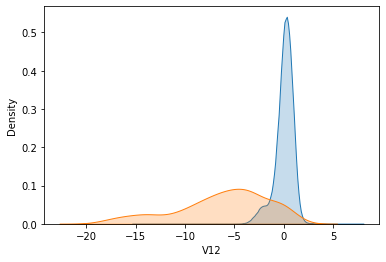

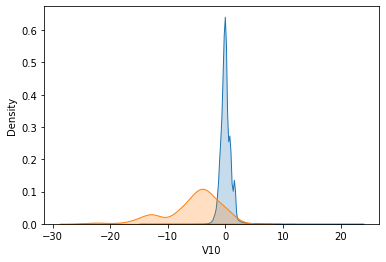

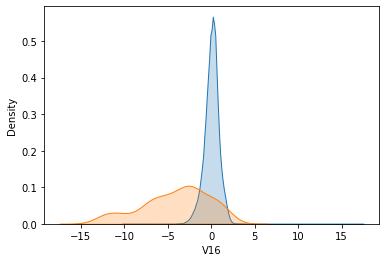

In [37]:
# Plot KDE for top5 values that belong to Class 0 (blue) and 1 (orange)
for i in top5.keys():
  sns.kdeplot(data=df[df['Class'] == 0][i], label="Class 0", shade=True)
  sns.kdeplot(data=df[df['Class'] == 1][i], label="Class 1", shade=True)
  plt.show()

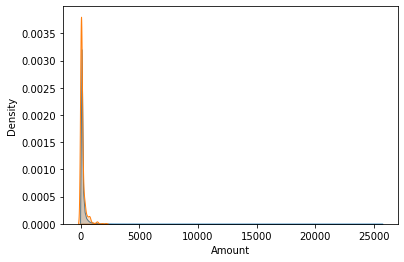

In [26]:
# Amount is not a correlated value and here is the demonstration of how KDE will look like for uncorrelated variable
# Plot KDE for Amount values that belong to Class 0 (Non Fraud)
sns.kdeplot(data=df[df['Class'] == 0]['Amount'], label="Class 0", shade=True)
# Plot KDE for Amount values that belong to Class 1 (Fraud)
sns.kdeplot(data=df[df['Class'] == 1]['Amount'], label="Class 1", shade=True)